In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("../data/FuelConsumption.csv")
cdf=df[['ENGINESIZE','CYLINDERS','CO2EMISSIONS','FUELCONSUMPTION_COMB']]

In [29]:
cdf.head(9)

,ENGINESIZE,CYLINDERS,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,2.0,4,196,8.5
1,2.4,4,221,9.6
2,1.5,4,136,5.9
3,3.5,6,255,11.1
4,3.5,6,244,10.6
5,3.5,6,230,10.0
6,3.5,6,232,10.1
7,3.7,6,255,11.1
8,3.7,6,267,11.6


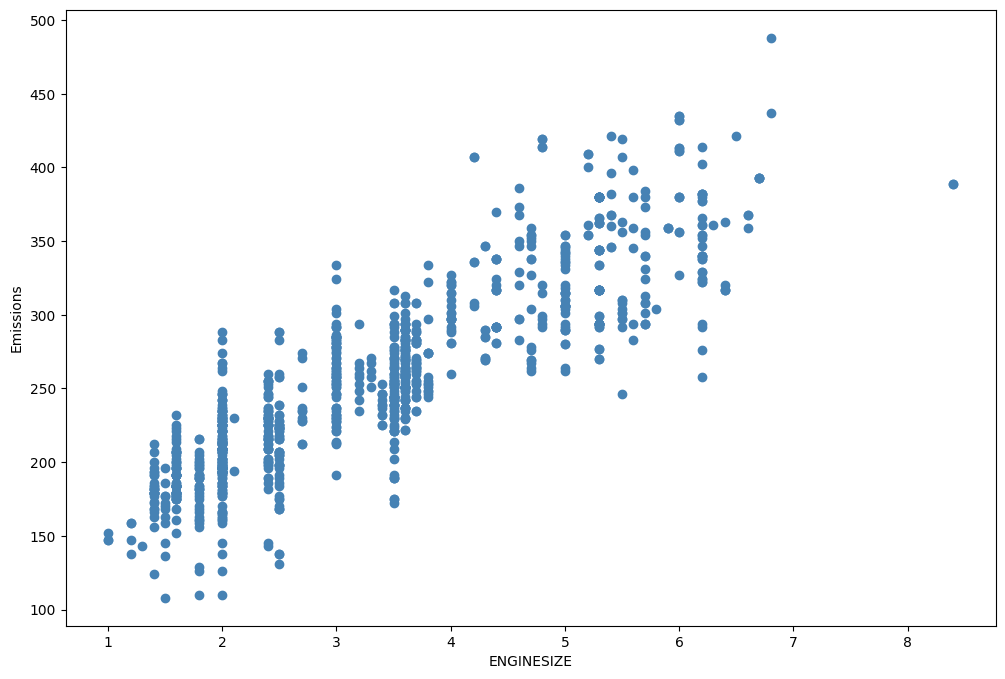

In [30]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(df,test_size=0.2)

- In polynomial regression,the relationship between the independent variable x and the dependent variable y is modeled as  nth degree polynomial in x.
2nd degree:
y=b +
For Example,the original feature set has only one feature:ENGINESIZE
If we select the degree of the polynomial to be 2:
It generates 3 features:degree=0,degree=1,degree=2

In [32]:
from sklearn.preprocessing import PolynomialFeatures
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])

test_x=np.asanyarray(train[["ENGINESIZE"]])

test_y=np.asanyarray(train[["CO2EMISSIONS"]])
poly=PolynomialFeatures(degree=2)

In [33]:
train_x_poly = poly.fit_transform(train_x)
print(train_x_poly)

[[ 1.    3.    9.  ]
 [ 1.    1.6   2.56]
 [ 1.    2.4   5.76]
 ...
 [ 1.    4.7  22.09]
 [ 1.    3.    9.  ]
 [ 1.    2.    4.  ]]


- Transformed data looks like feature sets of multiple linear regression analysis.
2nd degree quation  would be turn into:
y=
- Polynomial regression is a special case of linear regression ,with selection your features.


In [34]:
from sklearn import linear_model
clf=linear_model.LinearRegression()

In [35]:
train_y_=clf.fit(train_x_poly,train_y)

#The coefficients
print("Coefficients:",clf.coef_)
print("Intercept:" ,clf.intercept_)

Coefficients: [[ 0.         49.3570777  -1.42304717]]
Intercept: [109.59510217]


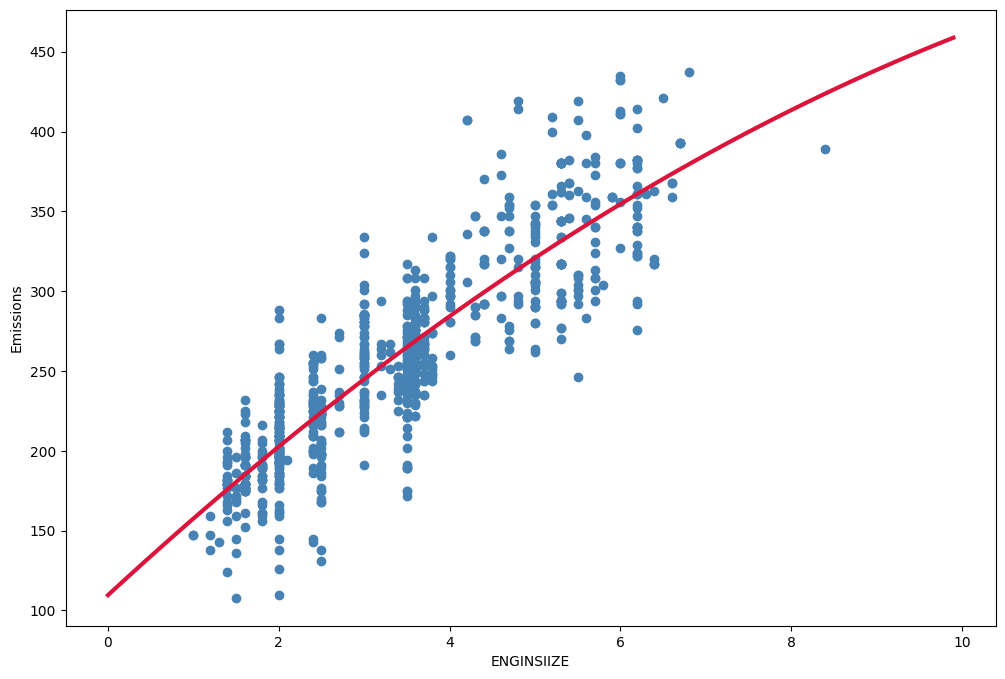

In [36]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color="steelblue")
XX=np.arange(0.0,10.0,0.1)
yy=clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX,2)
plt.plot(XX,yy,"crimson",linewidth=3)
plt.xlabel("ENGINSIIZE")
plt.ylabel("Emissions")
plt.show()


In [37]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[109.59510217 114.51657947 119.40959582 124.27415123 129.1102457
 133.91787922 138.6970518  143.44776344 148.17001413 152.86380388
 157.52913269 162.16600055 166.77440747 171.35435345 175.90583848
 180.42886257 184.92342572 189.38952792 193.82716918 198.23634949
 202.61706886 206.96932729 211.29312478 215.58846132 219.85533691
 224.09375157 228.30370528 232.48519805 236.63822987 240.76280075
 244.85891069 248.92655968 252.96574773 256.97647483 260.958741
 264.91254622 268.83789049 272.73477382 276.60319621 280.44315766
 284.25465816 288.03769772 291.79227633 295.518394   299.21605073
 3

# Evalution
- Mean Absolute Error (MAE)
- Mean Squared Error (SME)
- R2-Score

In [38]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print(f"Mean Absolute Error (MAE): {np.mean(np.absolute(test_y_ - test_y)):.2f}")
print(f"Mean Squared Error (MSE): {np.mean((test_y_ - test_y) ** 2):.2f}")
print(f"R2-Score: {r2_score(test_y, test_y_):.2f}")

Mean Absolute Error (MAE): 22.96
Mean Squared Error (MSE): 902.90
R2-Score: 0.77


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# tahmin ettiği değerler
predicted_y = clf.predict(train_x_poly)

mae = mean_absolute_error(train_y, predicted_y)
print("MAE: ", mae)

mse = mean_squared_error(train_y, predicted_y)
print("MSE: ", mse)

rmse=np.sqrt(mean_squared_error(train_y, predicted_y))
print("RMSE: ", rmse)

r2=r2_score(train_y, predicted_y)
print("r²: ", r2)

MAE:  22.959264422882818
MSE:  902.9030597502598
RMSE:  30.0483453745836
r²:  0.7713007449364744


## Practice
Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

In [63]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=3)

In [64]:
train_x_poly = poly.fit_transform(train_x)
print(train_x_poly)

[[  1.      1.6     2.56    4.096]
 [  1.      6.6    43.56  287.496]
 [  1.      2.5     6.25   15.625]
 ...
 [  1.      5.     25.    125.   ]
 [  1.      1.8     3.24    5.832]
 [  1.      5.5    30.25  166.375]]


In [65]:
from sklearn import linear_model

clf=linear_model.LinearRegression()

In [66]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         30.57350894  3.98776306 -0.45477484]]
Intercept: [127.94860521]


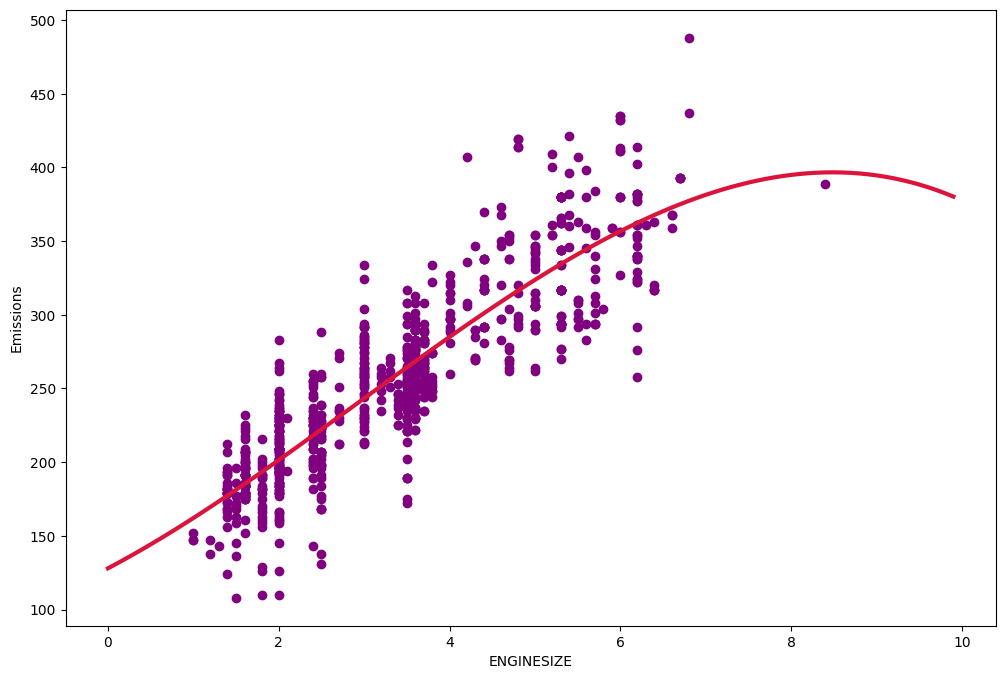

In [67]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="purple")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2) + clf.coef_[0][3] * np.power(XX,3)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [68]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[127.94860521 131.04537896 134.21917932 137.46727764 140.78694528
 144.17545359 147.63007391 151.1480776  154.726736   158.36332047
 162.05510237 165.79935303 169.59334382 173.43434608 177.31963116
 181.24647041 185.21213519 189.21389685 193.24902674 197.3147962
 201.40847659 205.52733926 209.66865557 213.82969685 218.00773447
 222.20003977 226.40388411 230.61653883 234.83527529 239.05736483
 243.28007882 247.50068859 251.7164655  255.92468091 260.12260616
 264.3075126  268.47667158 272.62735446 276.75683259 280.86237731
 284.94125998 288.99075195 293.00812457 296.99064919 300.93559717


In [69]:
from sklearn.metrics import r2_score

# Test verileri polinomla dönüştürülür
test_x_poly = poly.transform(test_x)

# Tahminler yapılır
test_y_ = clf.predict(test_x_poly)

# Hata ve R2 skorları hesaplanır
print(f"Mean Absolute Error (MAE): {np.mean(np.absolute(test_y_ - test_y)):.2f}")
print(f"Mean Squared Error (MSE): {np.mean((test_y_ - test_y) ** 2):.2f}")
print(f"R2-Score: {r2_score(test_y, test_y_):.2f}")

Mean Absolute Error (MAE): 24.29
Mean Squared Error (MSE): 1030.37
R2-Score: 0.72
